In [613]:
import pandas as pd
df_helpline = pd.read_csv('./dummy/yugyeongjo.Helpline.csv')
df_helpline[:1]

,_id,title_disease,date,post_contents,reply_contents
0,65dbe0a7a48a1fe6c0dcc313,소아피부근염\n질환명 : 기타 피부근염 (M33.1),2024-02-20 16:54,2015년생 딸아이가 기타피부근염 진단받았는데\n의료지원대상인지 궁금합니다,안녕하세요?\n\n1:1 상담을 통해 문의하신 사항에 대해 답변 드립니다.\n\n‘...


## 데이터 전처리
- 게시글명 & 질환명 data 분리
- 응답 반복 인사말 삭제
- 너무 자주 반복되는 단어 삭제
- 너무 적게 반복되는 단어 삭제

In [614]:
df_helpline.drop('_id', axis=1, inplace=True)

In [615]:
df_helpline['disease_name'] = df_helpline['title_disease']
df_helpline[:5]

,title_disease,date,post_contents,reply_contents,disease_name
0,소아피부근염\n질환명 : 기타 피부근염 (M33.1),2024-02-20 16:54,2015년생 딸아이가 기타피부근염 진단받았는데\n의료지원대상인지 궁금합니다,안녕하세요?\n\n1:1 상담을 통해 문의하신 사항에 대해 답변 드립니다.\n\n‘...,소아피부근염\n질환명 : 기타 피부근염 (M33.1)
1,상계백병원에서 근무력증 진단을 받았습니다.\n질환명 : 중증근무력증 (G70.0),2024-02-20 16:32,아버지께서 중증근무력증 진단을 받으셨는데 서울대학병원에서 다시한번 검사를 받을수 있...,안녕하세요?\n\n1:1 상담을 통해 문의하신 사항에 대해 답변 드립니다.\n\n개...,상계백병원에서 근무력증 진단을 받았습니다.\n질환명 : 중증근무력증 (G70.0)
2,국민연금 장애연금\n질환명 : 특발성 무형성빈혈 (D61.3),2024-02-20 10:57,"희귀질환 의료비 지원사업 국민연금공단에서 나오는 장애연금, 노령연금도 소득에 반영되...",안녕하세요?\n\n1:1 상담을 통해 문의하신 사항에 대해 답변 드립니다.\n\n『...,국민연금 장애연금\n질환명 : 특발성 무형성빈혈 (D61.3)
3,희귀질환 의료비 지원사업 신청후에....\n질환명 : 항인지질항체증후군 (D68.6),2024-02-20 00:26,24년 01월16일 신청후ㅡ결과는?\n언제 결과를 알수 있나요??\n빨리좀 처리 해주세요,안녕하세요?\n\n1:1 상담을 통해 문의하신 사항에 대해 답변 드립니다.\n\n『...,희귀질환 의료비 지원사업 신청후에....\n질환명 : 항인지질항체증후군 (D68.6)
4,의료비지원 부양의무자,2024-02-19 17:07,24년 기준 부양의무자 재산기준이 상향되었다고 기사보았는데요 언제부터시행가능한가요\...,안녕하세요?\n\n1:1 상담을 통해 문의하신 사항에 대해 답변 드립니다.\n\n『...,의료비지원 부양의무자


In [616]:
df_helpline.rename(columns={'title_disease':'post_title'}, inplace=True)
df_helpline[:5]

,post_title,date,post_contents,reply_contents,disease_name
0,소아피부근염\n질환명 : 기타 피부근염 (M33.1),2024-02-20 16:54,2015년생 딸아이가 기타피부근염 진단받았는데\n의료지원대상인지 궁금합니다,안녕하세요?\n\n1:1 상담을 통해 문의하신 사항에 대해 답변 드립니다.\n\n‘...,소아피부근염\n질환명 : 기타 피부근염 (M33.1)
1,상계백병원에서 근무력증 진단을 받았습니다.\n질환명 : 중증근무력증 (G70.0),2024-02-20 16:32,아버지께서 중증근무력증 진단을 받으셨는데 서울대학병원에서 다시한번 검사를 받을수 있...,안녕하세요?\n\n1:1 상담을 통해 문의하신 사항에 대해 답변 드립니다.\n\n개...,상계백병원에서 근무력증 진단을 받았습니다.\n질환명 : 중증근무력증 (G70.0)
2,국민연금 장애연금\n질환명 : 특발성 무형성빈혈 (D61.3),2024-02-20 10:57,"희귀질환 의료비 지원사업 국민연금공단에서 나오는 장애연금, 노령연금도 소득에 반영되...",안녕하세요?\n\n1:1 상담을 통해 문의하신 사항에 대해 답변 드립니다.\n\n『...,국민연금 장애연금\n질환명 : 특발성 무형성빈혈 (D61.3)
3,희귀질환 의료비 지원사업 신청후에....\n질환명 : 항인지질항체증후군 (D68.6),2024-02-20 00:26,24년 01월16일 신청후ㅡ결과는?\n언제 결과를 알수 있나요??\n빨리좀 처리 해주세요,안녕하세요?\n\n1:1 상담을 통해 문의하신 사항에 대해 답변 드립니다.\n\n『...,희귀질환 의료비 지원사업 신청후에....\n질환명 : 항인지질항체증후군 (D68.6)
4,의료비지원 부양의무자,2024-02-19 17:07,24년 기준 부양의무자 재산기준이 상향되었다고 기사보았는데요 언제부터시행가능한가요\...,안녕하세요?\n\n1:1 상담을 통해 문의하신 사항에 대해 답변 드립니다.\n\n『...,의료비지원 부양의무자


In [617]:
post_title_name=[]
for i in range(df_helpline.shape[0]):
    try:
        str_len = df_helpline['post_title'][i].index('\\')
        name = df_helpline['post_title'][i][0:str_len]
    except:
        name = df_helpline['post_title'][i]
    post_title_name.append(name)

In [618]:
df_helpline['post_title'] = post_title_name
df_helpline[:5]

,post_title,date,post_contents,reply_contents,disease_name
0,소아피부근염,2024-02-20 16:54,2015년생 딸아이가 기타피부근염 진단받았는데\n의료지원대상인지 궁금합니다,안녕하세요?\n\n1:1 상담을 통해 문의하신 사항에 대해 답변 드립니다.\n\n‘...,소아피부근염\n질환명 : 기타 피부근염 (M33.1)
1,상계백병원에서 근무력증 진단을 받았습니다.,2024-02-20 16:32,아버지께서 중증근무력증 진단을 받으셨는데 서울대학병원에서 다시한번 검사를 받을수 있...,안녕하세요?\n\n1:1 상담을 통해 문의하신 사항에 대해 답변 드립니다.\n\n개...,상계백병원에서 근무력증 진단을 받았습니다.\n질환명 : 중증근무력증 (G70.0)
2,국민연금 장애연금,2024-02-20 10:57,"희귀질환 의료비 지원사업 국민연금공단에서 나오는 장애연금, 노령연금도 소득에 반영되...",안녕하세요?\n\n1:1 상담을 통해 문의하신 사항에 대해 답변 드립니다.\n\n『...,국민연금 장애연금\n질환명 : 특발성 무형성빈혈 (D61.3)
3,희귀질환 의료비 지원사업 신청후에....,2024-02-20 00:26,24년 01월16일 신청후ㅡ결과는?\n언제 결과를 알수 있나요??\n빨리좀 처리 해주세요,안녕하세요?\n\n1:1 상담을 통해 문의하신 사항에 대해 답변 드립니다.\n\n『...,희귀질환 의료비 지원사업 신청후에....\n질환명 : 항인지질항체증후군 (D68.6)
4,의료비지원 부양의무자,2024-02-19 17:07,24년 기준 부양의무자 재산기준이 상향되었다고 기사보았는데요 언제부터시행가능한가요\...,안녕하세요?\n\n1:1 상담을 통해 문의하신 사항에 대해 답변 드립니다.\n\n『...,의료비지원 부양의무자


In [619]:
disease_name=[]
for i in range(df_helpline.shape[0]):
    try:
        str_len = df_helpline['disease_name'][i].index(': ')
        name = df_helpline['disease_name'][i][str_len+2:]
    except:
        name = " "
    disease_name.append(name)

In [620]:
df_helpline['disease_name'] = disease_name
df_helpline[:5]

,post_title,date,post_contents,reply_contents,disease_name
0,소아피부근염,2024-02-20 16:54,2015년생 딸아이가 기타피부근염 진단받았는데\n의료지원대상인지 궁금합니다,안녕하세요?\n\n1:1 상담을 통해 문의하신 사항에 대해 답변 드립니다.\n\n‘...,기타 피부근염 (M33.1)
1,상계백병원에서 근무력증 진단을 받았습니다.,2024-02-20 16:32,아버지께서 중증근무력증 진단을 받으셨는데 서울대학병원에서 다시한번 검사를 받을수 있...,안녕하세요?\n\n1:1 상담을 통해 문의하신 사항에 대해 답변 드립니다.\n\n개...,중증근무력증 (G70.0)
2,국민연금 장애연금,2024-02-20 10:57,"희귀질환 의료비 지원사업 국민연금공단에서 나오는 장애연금, 노령연금도 소득에 반영되...",안녕하세요?\n\n1:1 상담을 통해 문의하신 사항에 대해 답변 드립니다.\n\n『...,특발성 무형성빈혈 (D61.3)
3,희귀질환 의료비 지원사업 신청후에....,2024-02-20 00:26,24년 01월16일 신청후ㅡ결과는?\n언제 결과를 알수 있나요??\n빨리좀 처리 해주세요,안녕하세요?\n\n1:1 상담을 통해 문의하신 사항에 대해 답변 드립니다.\n\n『...,항인지질항체증후군 (D68.6)
4,의료비지원 부양의무자,2024-02-19 17:07,24년 기준 부양의무자 재산기준이 상향되었다고 기사보았는데요 언제부터시행가능한가요\...,안녕하세요?\n\n1:1 상담을 통해 문의하신 사항에 대해 답변 드립니다.\n\n『...,


In [621]:
disease_name_hello=[]
for i in range(df_helpline.shape[0]):
    try:
        str_len = df_helpline['reply_contents'][i].index('드립니다.\\n\\n')
        name = df_helpline['reply_contents'][i][str_len+9:]
    except:
        name = df_helpline['reply_contents'][i]
    disease_name_hello.append(name)

In [622]:
df_helpline['reply_contents'] = disease_name_hello
df_helpline[:5]

,post_title,date,post_contents,reply_contents,disease_name
0,소아피부근염,2024-02-20 16:54,2015년생 딸아이가 기타피부근염 진단받았는데\n의료지원대상인지 궁금합니다,‘희귀질환 산정특례’ 및 ‘희귀질환자 의료비지원사업’은 「희귀질환관리법」에 따라 지...,기타 피부근염 (M33.1)
1,상계백병원에서 근무력증 진단을 받았습니다.,2024-02-20 16:32,아버지께서 중증근무력증 진단을 받으셨는데 서울대학병원에서 다시한번 검사를 받을수 있...,개별 의료기관을 통한 진단 여부는 해당 의료기관을 통해 문의하여 주시기 바랍니다.\...,중증근무력증 (G70.0)
2,국민연금 장애연금,2024-02-20 10:57,"희귀질환 의료비 지원사업 국민연금공단에서 나오는 장애연금, 노령연금도 소득에 반영되...",『희귀질환자 의료비지원사업』은 희귀질환 산정특례에 등록된 일부 저소득층 건강보험가입...,특발성 무형성빈혈 (D61.3)
3,희귀질환 의료비 지원사업 신청후에....,2024-02-20 00:26,24년 01월16일 신청후ㅡ결과는?\n언제 결과를 알수 있나요??\n빨리좀 처리 해주세요,『희귀질환자 의료비지원사업』은 희귀질환 산정특례에 등록된 일부 저소득층 건강보험가입...,항인지질항체증후군 (D68.6)
4,의료비지원 부양의무자,2024-02-19 17:07,24년 기준 부양의무자 재산기준이 상향되었다고 기사보았는데요 언제부터시행가능한가요\...,『희귀질환자 의료비지원사업』은 희귀질환 산정특례에 등록된 일부 저소득층 건강보험가입...,


In [623]:
df_helpline['user_text'] = df_helpline['post_title']+ " " + df_helpline['post_contents']
df_helpline[:5]

,post_title,date,post_contents,reply_contents,disease_name,user_text
0,소아피부근염,2024-02-20 16:54,2015년생 딸아이가 기타피부근염 진단받았는데\n의료지원대상인지 궁금합니다,‘희귀질환 산정특례’ 및 ‘희귀질환자 의료비지원사업’은 「희귀질환관리법」에 따라 지...,기타 피부근염 (M33.1),소아피부근염 2015년생 딸아이가 기타피부근염 진단받았는데\n의료지원대상인지 궁금합니다
1,상계백병원에서 근무력증 진단을 받았습니다.,2024-02-20 16:32,아버지께서 중증근무력증 진단을 받으셨는데 서울대학병원에서 다시한번 검사를 받을수 있...,개별 의료기관을 통한 진단 여부는 해당 의료기관을 통해 문의하여 주시기 바랍니다.\...,중증근무력증 (G70.0),상계백병원에서 근무력증 진단을 받았습니다. 아버지께서 중증근무력증 진단을 받으셨는데...
2,국민연금 장애연금,2024-02-20 10:57,"희귀질환 의료비 지원사업 국민연금공단에서 나오는 장애연금, 노령연금도 소득에 반영되...",『희귀질환자 의료비지원사업』은 희귀질환 산정특례에 등록된 일부 저소득층 건강보험가입...,특발성 무형성빈혈 (D61.3),"국민연금 장애연금 희귀질환 의료비 지원사업 국민연금공단에서 나오는 장애연금, 노령연..."
3,희귀질환 의료비 지원사업 신청후에....,2024-02-20 00:26,24년 01월16일 신청후ㅡ결과는?\n언제 결과를 알수 있나요??\n빨리좀 처리 해주세요,『희귀질환자 의료비지원사업』은 희귀질환 산정특례에 등록된 일부 저소득층 건강보험가입...,항인지질항체증후군 (D68.6),희귀질환 의료비 지원사업 신청후에.... 24년 01월16일 신청후ㅡ결과는?\n언제...
4,의료비지원 부양의무자,2024-02-19 17:07,24년 기준 부양의무자 재산기준이 상향되었다고 기사보았는데요 언제부터시행가능한가요\...,『희귀질환자 의료비지원사업』은 희귀질환 산정특례에 등록된 일부 저소득층 건강보험가입...,,의료비지원 부양의무자 24년 기준 부양의무자 재산기준이 상향되었다고 기사보았는데요 ...


### 단어 제거

In [624]:
import re
patterns = '(\\\\n|\n)'
series = []
for contents in df_helpline['user_text']:
    text_regex = re.sub(pattern=patterns, repl=' ', string=contents)
    series.append(text_regex)
series[:5]

['소아피부근염 2015년생 딸아이가 기타피부근염 진단받았는데 의료지원대상인지 궁금합니다',
 '상계백병원에서 근무력증 진단을 받았습니다. 아버지께서 중증근무력증 진단을 받으셨는데 서울대학병원에서 다시한번 검사를 받을수 있는지 여쭤봅니다.',
 '국민연금 장애연금 희귀질환 의료비 지원사업 국민연금공단에서 나오는 장애연금, 노령연금도 소득에 반영되나요???',
 '희귀질환 의료비 지원사업 신청후에.... 24년 01월16일 신청후ㅡ결과는? 언제 결과를 알수 있나요?? 빨리좀 처리 해주세요',
 '의료비지원 부양의무자 24년 기준 부양의무자 재산기준이 상향되었다고 기사보았는데요 언제부터시행가능한가요 보건소담장자는 전혀 들은바가 없다고만하는데요 금액은 공시지가기준인지 어떤기준인지 알고싶고요 빨리 안내해주시면 신청하려고합니다']

In [625]:
df_helpline['user_text'] = series
df_helpline['user_text']

0        소아피부근염 2015년생 딸아이가 기타피부근염 진단받았는데 의료지원대상인지 궁금합니다
1      상계백병원에서 근무력증 진단을 받았습니다. 아버지께서 중증근무력증 진단을 받으셨는데...
2      국민연금 장애연금 희귀질환 의료비 지원사업 국민연금공단에서 나오는 장애연금, 노령연...
3      희귀질환 의료비 지원사업 신청후에.... 24년 01월16일 신청후ㅡ결과는? 언제 ...
4      의료비지원 부양의무자 24년 기준 부양의무자 재산기준이 상향되었다고 기사보았는데요 ...
                             ...                        
700    질환명 변경에 따른 협회명 변경 관련 업무에 노고가 많으십니다.  한국강직척추염협회...
701    PTEN 과오종 증후군 희귀질환코드 안녕하세요 홈페이지 개편전에 문의를 드렸는데 그...
702    질병 확정과 진단 그리고 지원 사업을 알고 싶습니다. 12월10일 부친께서 갑작스런...
703    polymicrogyria 가 V214 로 산정특례등록이 가능한가요? 3세 남아로 ...
704    척수소뇌성 운동실조(Spinocerebellar ataxia: SCA)코딩 척수소뇌...
Name: user_text, Length: 705, dtype: object

### 불용어, 형태소 분석기

In [626]:
# 불용어 리스트 생성 (예시)
stopwords = ["있다", "안되다", "없다"]

# 토크나이징 함수 정의
from konlpy.tag import Okt
okt = Okt()

def tokenizer(raw, pos=["Noun","Alpha","Number", "Adjective"], stopword=stopwords):
    return [
        word for word, tag in okt.pos(
            raw, 
            stem=True    # stemming 바뀌나->바뀌다
            )
            if len(word) > 1 and tag in pos and word not in stopword

    ]

In [627]:
# tokenizing
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfVectorizer = TfidfVectorizer(tokenizer=tokenizer, max_df=0.95, min_df=2)

In [628]:
features = tfidfVectorizer.fit_transform(df_helpline['user_text'])
features.toarray()[:2]

/usr/local/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [629]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components=3, n_jobs=-1) #인스턴스화 #n_components 토픽의 갯수
lda_model.fit(features) #교육

LatentDirichletAllocation(n_components=3, n_jobs=-1)

In [630]:
dictionary_list = tfidfVectorizer.get_feature_names_out()
dictionary_list

array(['01월', '04.6', '10', ..., '힘드다', '힘들다', '힘없다'], dtype=object)

In [631]:
lda_model.components_

array([[0.33644268, 0.33549664, 0.34372195, ..., 0.45274326, 0.33652284,
        0.33579574],
       [0.3434123 , 0.33485216, 0.68463068, ..., 0.94327677, 1.43107199,
        0.48684745],
       [0.91468812, 0.8976936 , 2.2499783 , ..., 1.85263208, 1.51576361,
        0.44320094]])

In [632]:
topics_output = lda_model.transform(features)
df_topics_score = pd.DataFrame(data=topics_output)
df_topics_score

,0,1,2
0,0.096200,0.299654,0.604146
1,0.085835,0.088458,0.825707
2,0.094717,0.093962,0.811321
3,0.085331,0.083584,0.831085
4,0.072330,0.072282,0.855388
...,...,...,...
700,0.075858,0.075890,0.848251
701,0.060496,0.256104,0.683400
702,0.040608,0.049299,0.910093
703,0.057561,0.057196,0.885243


In [633]:
import numpy as np
df_topics_score['dominant_topic_number'] = np.argmax(topics_output, axis=1)
df_topics_score['sentences'] = df_helpline['user_text']
df_topics_score

,0,1,2,dominant_topic_number,sentences
0,0.096200,0.299654,0.604146,2,소아피부근염 2015년생 딸아이가 기타피부근염 진단받았는데 의료지원대상인지 궁금합니다
1,0.085835,0.088458,0.825707,2,상계백병원에서 근무력증 진단을 받았습니다. 아버지께서 중증근무력증 진단을 받으셨는데...
2,0.094717,0.093962,0.811321,2,"국민연금 장애연금 희귀질환 의료비 지원사업 국민연금공단에서 나오는 장애연금, 노령연..."
3,0.085331,0.083584,0.831085,2,희귀질환 의료비 지원사업 신청후에.... 24년 01월16일 신청후ㅡ결과는? 언제 ...
4,0.072330,0.072282,0.855388,2,의료비지원 부양의무자 24년 기준 부양의무자 재산기준이 상향되었다고 기사보았는데요 ...
...,...,...,...,...,...
700,0.075858,0.075890,0.848251,2,질환명 변경에 따른 협회명 변경 관련 업무에 노고가 많으십니다. 한국강직척추염협회...
701,0.060496,0.256104,0.683400,2,PTEN 과오종 증후군 희귀질환코드 안녕하세요 홈페이지 개편전에 문의를 드렸는데 그...
702,0.040608,0.049299,0.910093,2,질병 확정과 진단 그리고 지원 사업을 알고 싶습니다. 12월10일 부친께서 갑작스런...
703,0.057561,0.057196,0.885243,2,polymicrogyria 가 V214 로 산정특례등록이 가능한가요? 3세 남아로 ...


### topic별 word 추출

In [634]:
## 상위 단어 추출
## 0 확률 1은 dictionary
topics_list = list()
for topic in lda_model.components_:
    df_datas = [topic, dictionary_list]
    df_topics = pd.DataFrame(data=df_datas)
    df_topics= df_topics.T
    df_topics = df_topics.sort_values(0, ascending=False)
    # print(df_topics[:3])
    topics_text = ' '.join(df_topics[1].values[:10])# 시리즈 형식으로 출력 get values from series / index
    print(topics_text)
    topics_list.append(topics_text)


topics_list_add = [topics_list, ['Topic0', 'Topic1', 'Topic2']]
df_topics_keywords = pd.DataFrame(topics_list_add)

카드 syndrome 원추각막 불완전 장염 파킨슨병 and 버거 간질 기면병
수술 검사 병원 피부 모야 증상 정도 운동 관절 pten
희귀질환 의료 특례 산정 질환 등록 지원 진단 신청 병원


In [635]:
df_topics_keywords

,0,1,2
0,카드 syndrome 원추각막 불완전 장염 파킨슨병 and 버거 간질 기면병,수술 검사 병원 피부 모야 증상 정도 운동 관절 pten,희귀질환 의료 특례 산정 질환 등록 지원 진단 신청 병원
1,Topic0,Topic1,Topic2


In [636]:
import pyLDAvis
import pyLDAvis.lda_model

In [637]:
vis = pyLDAvis.lda_model.prepare(lda_model, features, tfidfVectorizer) # 토픽모델, 교육이 끝난 값(행렬형태), 교육모델

In [638]:
pyLDAvis.enable_notebook()
pyLDAvis.display(vis) # PCA - 차원축소

## 시각화

In [639]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
df_helpline

,post_title,date,post_contents,reply_contents,disease_name,user_text
0,소아피부근염,2024-02-20 16:54,2015년생 딸아이가 기타피부근염 진단받았는데\n의료지원대상인지 궁금합니다,‘희귀질환 산정특례’ 및 ‘희귀질환자 의료비지원사업’은 「희귀질환관리법」에 따라 지...,기타 피부근염 (M33.1),소아피부근염 2015년생 딸아이가 기타피부근염 진단받았는데 의료지원대상인지 궁금합니다
1,상계백병원에서 근무력증 진단을 받았습니다.,2024-02-20 16:32,아버지께서 중증근무력증 진단을 받으셨는데 서울대학병원에서 다시한번 검사를 받을수 있...,개별 의료기관을 통한 진단 여부는 해당 의료기관을 통해 문의하여 주시기 바랍니다.\...,중증근무력증 (G70.0),상계백병원에서 근무력증 진단을 받았습니다. 아버지께서 중증근무력증 진단을 받으셨는데...
2,국민연금 장애연금,2024-02-20 10:57,"희귀질환 의료비 지원사업 국민연금공단에서 나오는 장애연금, 노령연금도 소득에 반영되...",『희귀질환자 의료비지원사업』은 희귀질환 산정특례에 등록된 일부 저소득층 건강보험가입...,특발성 무형성빈혈 (D61.3),"국민연금 장애연금 희귀질환 의료비 지원사업 국민연금공단에서 나오는 장애연금, 노령연..."
3,희귀질환 의료비 지원사업 신청후에....,2024-02-20 00:26,24년 01월16일 신청후ㅡ결과는?\n언제 결과를 알수 있나요??\n빨리좀 처리 해주세요,『희귀질환자 의료비지원사업』은 희귀질환 산정특례에 등록된 일부 저소득층 건강보험가입...,항인지질항체증후군 (D68.6),희귀질환 의료비 지원사업 신청후에.... 24년 01월16일 신청후ㅡ결과는? 언제 ...
4,의료비지원 부양의무자,2024-02-19 17:07,24년 기준 부양의무자 재산기준이 상향되었다고 기사보았는데요 언제부터시행가능한가요\...,『희귀질환자 의료비지원사업』은 희귀질환 산정특례에 등록된 일부 저소득층 건강보험가입...,,의료비지원 부양의무자 24년 기준 부양의무자 재산기준이 상향되었다고 기사보았는데요 ...
...,...,...,...,...,...,...
700,질환명 변경에 따른 협회명 변경 관련,2018-12-31 08:57,"업무에 노고가 많으십니다.\n\n한국강직척추염협회(구, 한국강직성척추염협회)의 단체...",'강직척추염환우회'에서 요청하신 관련사이트 정보가 변경되었음을 안내드립니다.\n\n...,강직척추염,질환명 변경에 따른 협회명 변경 관련 업무에 노고가 많으십니다. 한국강직척추염협회...
701,PTEN 과오종 증후군 희귀질환코드,2018-12-31 01:44,안녕하세요 홈페이지 개편전에 문의를 드렸는데 그땐 (PTEN 과오종 증후군) 이 산...,"기존에는 보건복지부에서 지정한 희귀질환은 없었으며, 「희귀질환관리법」이 시행(’16...",PTEN 과오종 증후군,PTEN 과오종 증후군 희귀질환코드 안녕하세요 홈페이지 개편전에 문의를 드렸는데 그...
702,질병 확정과 진단 그리고 지원 사업을 알고 싶습니다.,2018-12-30 01:11,"12월10일 부친께서 갑작스런 호흡곤란과 의식 불명으로 응급실로 이동하셨고, 현재 ...",『희귀질환 산정특례』 제도는 고비용이 발생하는 희귀질환자의 의료비 부담을 낮추기 위...,성인호흡곤란증후군,질병 확정과 진단 그리고 지원 사업을 알고 싶습니다. 12월10일 부친께서 갑작스런...
703,polymicrogyria 가 V214 로 산정특례등록이 가능한가요?,2018-12-27 09:44,3세 남아로 발달지연(좌측 편마비)과 우측 4/5수지 선천결손으로 시행한 B-MRI...,"기존에는 보건복지부에서 지정한 희귀질환은 없었으며, 「희귀질환관리법」이 시행(’16...",,polymicrogyria 가 V214 로 산정특례등록이 가능한가요? 3세 남아로 ...


In [640]:
df_helpline['disease_name'].value_counts()

disease_name
                                    250
원추각막 (H18.6)                          9
돌발성 운동유발 이상운동 (G24.8)                 7
말초혈관계통의 상세불명의 선천기형                    6
다운증후군                                 5
                                   ... 
반척추유합 또는 척주측만증을 동반한 분절부전 (Q76.3)      1
주버트 증후군                               1
후종인대(後從靭帶)의 골화 (M48.8)                1
신경성섬유종                                1
Gano1                                 1
Name: count, Length: 361, dtype: int64

In [641]:
type(df_helpline['date'][0])

str

#### 질병종류에 따른 특별한 양상을 보이지는 않음

In [642]:
df_helpline['date'][0].index(":")

13

In [643]:
cleaning_date = []
for i in range(df_helpline.shape[0]):
    try:
        str_len = df_helpline['date'][i].index(":")
        clean_date = df_helpline['date'][i][:10]
    except:
        clean_date = df_helpline['date'][i]
    cleaning_date.append(clean_date)
cleaning_date[:5]

['2024-02-20', '2024-02-20', '2024-02-20', '2024-02-20', '2024-02-19']

In [644]:
df_helpline['date'] = cleaning_date
df_helpline[:5]

,post_title,date,post_contents,reply_contents,disease_name,user_text
0,소아피부근염,2024-02-20,2015년생 딸아이가 기타피부근염 진단받았는데\n의료지원대상인지 궁금합니다,‘희귀질환 산정특례’ 및 ‘희귀질환자 의료비지원사업’은 「희귀질환관리법」에 따라 지...,기타 피부근염 (M33.1),소아피부근염 2015년생 딸아이가 기타피부근염 진단받았는데 의료지원대상인지 궁금합니다
1,상계백병원에서 근무력증 진단을 받았습니다.,2024-02-20,아버지께서 중증근무력증 진단을 받으셨는데 서울대학병원에서 다시한번 검사를 받을수 있...,개별 의료기관을 통한 진단 여부는 해당 의료기관을 통해 문의하여 주시기 바랍니다.\...,중증근무력증 (G70.0),상계백병원에서 근무력증 진단을 받았습니다. 아버지께서 중증근무력증 진단을 받으셨는데...
2,국민연금 장애연금,2024-02-20,"희귀질환 의료비 지원사업 국민연금공단에서 나오는 장애연금, 노령연금도 소득에 반영되...",『희귀질환자 의료비지원사업』은 희귀질환 산정특례에 등록된 일부 저소득층 건강보험가입...,특발성 무형성빈혈 (D61.3),"국민연금 장애연금 희귀질환 의료비 지원사업 국민연금공단에서 나오는 장애연금, 노령연..."
3,희귀질환 의료비 지원사업 신청후에....,2024-02-20,24년 01월16일 신청후ㅡ결과는?\n언제 결과를 알수 있나요??\n빨리좀 처리 해주세요,『희귀질환자 의료비지원사업』은 희귀질환 산정특례에 등록된 일부 저소득층 건강보험가입...,항인지질항체증후군 (D68.6),희귀질환 의료비 지원사업 신청후에.... 24년 01월16일 신청후ㅡ결과는? 언제 ...
4,의료비지원 부양의무자,2024-02-19,24년 기준 부양의무자 재산기준이 상향되었다고 기사보았는데요 언제부터시행가능한가요\...,『희귀질환자 의료비지원사업』은 희귀질환 산정특례에 등록된 일부 저소득층 건강보험가입...,,의료비지원 부양의무자 24년 기준 부양의무자 재산기준이 상향되었다고 기사보았는데요 ...


In [645]:
df_helpline['date'] = pd.to_datetime(df_helpline['date'], format='%Y-%m-%d')
df_helpline['date_datetime_year'] = df_helpline['date'].dt.year
df_helpline['date_datetime_year']

0      2024
1      2024
2      2024
3      2024
4      2024
       ... 
700    2018
701    2018
702    2018
703    2018
704    2018
Name: date_datetime_year, Length: 705, dtype: int32

In [646]:
helpline_date = df_helpline['date_datetime_year'].value_counts()
helpline_date

date_datetime_year
2022    138
2019    137
2021    137
2023    131
2020    121
2024     36
2018      5
Name: count, dtype: int64

In [647]:
df_helpline

,post_title,date,post_contents,reply_contents,disease_name,user_text,date_datetime_year
0,소아피부근염,2024-02-20,2015년생 딸아이가 기타피부근염 진단받았는데\n의료지원대상인지 궁금합니다,‘희귀질환 산정특례’ 및 ‘희귀질환자 의료비지원사업’은 「희귀질환관리법」에 따라 지...,기타 피부근염 (M33.1),소아피부근염 2015년생 딸아이가 기타피부근염 진단받았는데 의료지원대상인지 궁금합니다,2024
1,상계백병원에서 근무력증 진단을 받았습니다.,2024-02-20,아버지께서 중증근무력증 진단을 받으셨는데 서울대학병원에서 다시한번 검사를 받을수 있...,개별 의료기관을 통한 진단 여부는 해당 의료기관을 통해 문의하여 주시기 바랍니다.\...,중증근무력증 (G70.0),상계백병원에서 근무력증 진단을 받았습니다. 아버지께서 중증근무력증 진단을 받으셨는데...,2024
2,국민연금 장애연금,2024-02-20,"희귀질환 의료비 지원사업 국민연금공단에서 나오는 장애연금, 노령연금도 소득에 반영되...",『희귀질환자 의료비지원사업』은 희귀질환 산정특례에 등록된 일부 저소득층 건강보험가입...,특발성 무형성빈혈 (D61.3),"국민연금 장애연금 희귀질환 의료비 지원사업 국민연금공단에서 나오는 장애연금, 노령연...",2024
3,희귀질환 의료비 지원사업 신청후에....,2024-02-20,24년 01월16일 신청후ㅡ결과는?\n언제 결과를 알수 있나요??\n빨리좀 처리 해주세요,『희귀질환자 의료비지원사업』은 희귀질환 산정특례에 등록된 일부 저소득층 건강보험가입...,항인지질항체증후군 (D68.6),희귀질환 의료비 지원사업 신청후에.... 24년 01월16일 신청후ㅡ결과는? 언제 ...,2024
4,의료비지원 부양의무자,2024-02-19,24년 기준 부양의무자 재산기준이 상향되었다고 기사보았는데요 언제부터시행가능한가요\...,『희귀질환자 의료비지원사업』은 희귀질환 산정특례에 등록된 일부 저소득층 건강보험가입...,,의료비지원 부양의무자 24년 기준 부양의무자 재산기준이 상향되었다고 기사보았는데요 ...,2024
...,...,...,...,...,...,...,...
700,질환명 변경에 따른 협회명 변경 관련,2018-12-31,"업무에 노고가 많으십니다.\n\n한국강직척추염협회(구, 한국강직성척추염협회)의 단체...",'강직척추염환우회'에서 요청하신 관련사이트 정보가 변경되었음을 안내드립니다.\n\n...,강직척추염,질환명 변경에 따른 협회명 변경 관련 업무에 노고가 많으십니다. 한국강직척추염협회...,2018
701,PTEN 과오종 증후군 희귀질환코드,2018-12-31,안녕하세요 홈페이지 개편전에 문의를 드렸는데 그땐 (PTEN 과오종 증후군) 이 산...,"기존에는 보건복지부에서 지정한 희귀질환은 없었으며, 「희귀질환관리법」이 시행(’16...",PTEN 과오종 증후군,PTEN 과오종 증후군 희귀질환코드 안녕하세요 홈페이지 개편전에 문의를 드렸는데 그...,2018
702,질병 확정과 진단 그리고 지원 사업을 알고 싶습니다.,2018-12-30,"12월10일 부친께서 갑작스런 호흡곤란과 의식 불명으로 응급실로 이동하셨고, 현재 ...",『희귀질환 산정특례』 제도는 고비용이 발생하는 희귀질환자의 의료비 부담을 낮추기 위...,성인호흡곤란증후군,질병 확정과 진단 그리고 지원 사업을 알고 싶습니다. 12월10일 부친께서 갑작스런...,2018
703,polymicrogyria 가 V214 로 산정특례등록이 가능한가요?,2018-12-27,3세 남아로 발달지연(좌측 편마비)과 우측 4/5수지 선천결손으로 시행한 B-MRI...,"기존에는 보건복지부에서 지정한 희귀질환은 없었으며, 「희귀질환관리법」이 시행(’16...",,polymicrogyria 가 V214 로 산정특례등록이 가능한가요? 3세 남아로 ...,2018


In [648]:
helpline_yeardate = df_helpline['date_datetime_year'].value_counts()
df_helpline_yeardate = pd.DataFrame(helpline_yeardate)
df_helpline_yeardate

,count
date_datetime_year,
2022,138
2019,137
2021,137
2023,131
2020,121
2024,36
2018,5


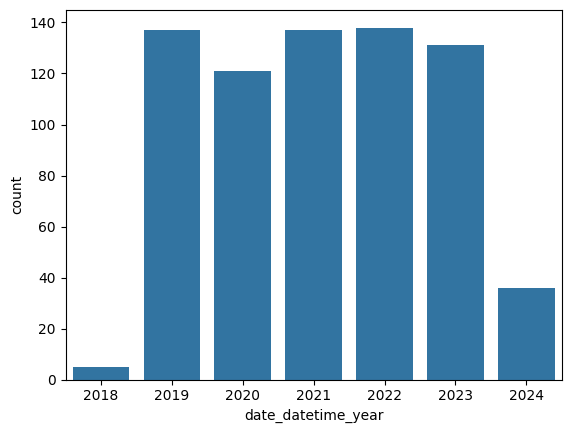

In [649]:
sns.barplot(data=df_helpline_yeardate, x="date_datetime_year", y="count")
plt.show()

#### 연도별 게시글 수 유의미하지 않음.

In [650]:
# condition = "date_datetime_year == 2023"
# df_helpline_2023 = df_helpline.query(condition)
# df_helpline_2023

,post_title,date,post_contents,reply_contents,disease_name,user_text,date_datetime_year
36,치료약 의로비 대상,2023-12-27,"치료제coq10,l카르니틴,리보프라빈,니아신 의료비혜택 받을수 있는지요?",안녕하세요?\n \n1:1 상담을 통해 문의하신 문의사항에 대해 답변 드립니다.\n...,달리 분류되지 않은 미토콘드리아근병증 (G71.3),"치료약 의로비 대상 치료제coq10,l카르니틴,리보프라빈,니아신 의료비혜택 받을수 ...",2023
37,제가 유당불내증이 심한편이라 유전자검사를 받아보고 싶은데요.,2023-12-22,안녕하세요. 아버지가 우유드시면 설사를 자주 하시는데 저는 어렸을때 모유먹고도 계속...,검사비 지원은 진단지원사업 대상질환 중 '희귀질환 유전자 진단지원사업'에 의뢰된 건...,젖당불내성 (E73),제가 유당불내증이 심한편이라 유전자검사를 받아보고 싶은데요. 안녕하세요. 아버지가 ...,2023
38,군발두통증후군 산정특례제도 되는지 확인하고싶어요,2023-12-20,군발두통증후군 G44.0\n아직 산정특례안되나요?,「희귀질환관리법」에 따라 지정 및 공고되는 희귀질환의 지정 기준 및 세부 기준(미지...,군발두통증후군 (G44.0),군발두통증후군 산정특례제도 되는지 확인하고싶어요 군발두통증후군 G44.0 아직 산정...,2023
39,수부이식 환자의 희귀질환지정 신청 방법 문의,2023-12-20,안녕하세요. 연세의대 성형외과 부교수 OOO입니다.\n\n다름이 아니옵고 수부이식 ...,희귀질환 지정은 치료행위가 아닌 질환을 기준으로 지정됩니다.\n- 통계청 한국표준질...,모든 복합의 팔 및 다리의 외상성 절단[모든 부위] (T05.6),수부이식 환자의 희귀질환지정 신청 방법 문의 안녕하세요. 연세의대 성형외과 부교수 ...,2023
40,진단및 치료가능 병원 진료과 알려주세요,2023-12-19,안녕하세요.\n강남 세브란스에서 패리룸버그신드롬 진단을 받고 그에 대한 확실한 진단...,"헬프라인은 '희귀질환정보-희귀질환정보'를 통해 1,165개 희귀질환 중 일부질환에 ...",안면신경의 기타 장애 (G51.8),진단및 치료가능 병원 진료과 알려주세요 안녕하세요. 강남 세브란스에서 패리룸버그신드...,2023
...,...,...,...,...,...,...,...
162,안녕하세요? 몇년전부터 국내에서 희귀질환 관리사업이 어떻게 이루어 질수 있었는지 궁...,2023-01-18,안녕하세요? 몇년전부터 국내에서 희귀질환 관리사업이 어떻게 이루어 질 수 있었는지 ...,"희귀질환자 의료비지원사업, 권역별 거점센터, 진단지원사업 등 희귀질환 관련 업무는 ...",,안녕하세요? 몇년전부터 국내에서 희귀질환 관리사업이 어떻게 이루어 질수 있었는지 궁...,2023
163,희귀질환에 해당이 되는 질병인지 궁금합니다.,2023-01-16,저희 아이가 선천성다수영구치결손입니다. \n\n초등학교에 입학해서도 유치가 빠지지 ...,1. 희귀질환 해당 여부 \n\n‘희귀질환 산정특례’ 및 ‘희귀질환자 의료비지원사업...,,희귀질환에 해당이 되는 질병인지 궁금합니다. 저희 아이가 선천성다수영구치결손입니다....,2023
164,산정특례 및 장애인 등록 관련,2023-01-09,동생(희귀질환자)을 예시로 문의 드리는점 양해바랍니다 \n\n동생이 원발경화성 담관...,안녕하세요?\n \n1:1 상담을 통해 문의하신 문의사항에 대해 답변 드립니다.\n...,원발 경화성 담관염,산정특례 및 장애인 등록 관련 동생(희귀질환자)을 예시로 문의 드리는점 양해바랍니다...,2023
165,희귀난치 질병,2023-01-02,"t(2.8.9.14),t(11.22)\n염색체 전좌로 진단을 받았는데\n희귀질환인가요?",‘희귀질환 산정특례’ 및 ‘희귀질환자 의료비지원사업’은 「희귀질환관리법」에 따라 지...,염색체전좌,"희귀난치 질병 t(2.8.9.14),t(11.22) 염색체 전좌로 진단을 받았는데 ...",2023
